# 🟩⬜🟥 COVID-19 Italy Analysis 🟩⬜🟥

In [1]:
# Importing the tools and the datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import logging, sys
logging.disable(sys.maxsize)

# Change style of plots
plt.style.use("ggplot")

# Set a default file path
FIGS_PATH = "figs/"

# Import the datasets
df_naz = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv",
                     parse_dates=["data"])
df_naz_latest = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale-latest.csv",
                            parse_dates=["data"])
df_reg = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv",
                     parse_dates=["data"])
df_reg_latest = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-latest.csv",
                            parse_dates=["data"])
df_prov = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv",
                      parse_dates=["data"])
df_prov_latest = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-latest.csv",
                             parse_dates=["data"])

## EDA (Exploratory Data Analysis

### DataFrame Nazional

In [2]:
print(df_naz.info())
df_naz.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   data                        97 non-null     datetime64[ns]
 1   stato                       97 non-null     object        
 2   ricoverati_con_sintomi      97 non-null     int64         
 3   terapia_intensiva           97 non-null     int64         
 4   totale_ospedalizzati        97 non-null     int64         
 5   isolamento_domiciliare      97 non-null     int64         
 6   totale_positivi             97 non-null     int64         
 7   variazione_totale_positivi  97 non-null     int64         
 8   nuovi_positivi              97 non-null     int64         
 9   dimessi_guariti             97 non-null     int64         
 10  deceduti                    97 non-null     int64         
 11  totale_casi                 97 non-null     int64         
 

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24 18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN,NaN
1,2020-02-25 18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN,NaN
2,2020-02-26 18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN,NaN
3,2020-02-27 18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN,NaN
4,2020-02-28 18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN,NaN


### DataFrame Regions

In [3]:
print(df_reg.info())
df_reg.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   data                        2037 non-null   datetime64[ns]
 1   stato                       2037 non-null   object        
 2   codice_regione              2037 non-null   int64         
 3   denominazione_regione       2037 non-null   object        
 4   lat                         2037 non-null   float64       
 5   long                        2037 non-null   float64       
 6   ricoverati_con_sintomi      2037 non-null   int64         
 7   terapia_intensiva           2037 non-null   int64         
 8   totale_ospedalizzati        2037 non-null   int64         
 9   isolamento_domiciliare      2037 non-null   int64         
 10  totale_positivi             2037 non-null   int64         
 11  variazione_totale_positivi  2037 non-null   int64       

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,NaN,NaN
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2020-02-24 18:00:00,ITA,21,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN
3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN
4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,NaN,NaN


### DataFrame Provinces

In [4]:
print(df_prov.info())
df_prov.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12416 entries, 0 to 12415
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   data                     12416 non-null  datetime64[ns]
 1   stato                    12416 non-null  object        
 2   codice_regione           12416 non-null  int64         
 3   denominazione_regione    12416 non-null  object        
 4   codice_provincia         12416 non-null  int64         
 5   denominazione_provincia  12416 non-null  object        
 6   sigla_provincia          10282 non-null  object        
 7   lat                      12416 non-null  float64       
 8   long                     12416 non-null  float64       
 9   totale_casi              12416 non-null  int64         
 10  note_it                  5 non-null      object        
 11  note_en                  5 non-null      object        
dtypes: datetime64[ns](1), float64(2)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN,NaN
1,2020-02-24 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN,NaN
2,2020-02-24 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN,NaN
3,2020-02-24 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN,NaN
4,2020-02-24 18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0,NaN,NaN


## Same important information about COVID-19 in Italy

In [5]:
print(f"Total number of Confirmed COVID 2019 cases across Italy:            {df_naz.totale_casi[len(df_naz)-1]}")
print(f"Total number of Active COVID 2019 cases across Italy:               {df_naz.totale_positivi[len(df_naz)-1]}")
print(f"Total number of Discharged Healed COVID 2019 cases across Italy:    {df_naz.dimessi_guariti[len(df_naz)-1]}")
print(f"Total number of Death due to COVID 2019 across Italy:               {df_naz.deceduti[len(df_naz)-1]}")
print(f"Total number of ICU People due to COVID 2019 across Italy:          {df_naz.terapia_intensiva[len(df_naz)-1]}")
print(f"Total numebr of Used Swabs due to COVID 2019 across Italy:          {df_naz.tamponi[len(df_naz)-1]}")

Total number of Confirmed COVID 2019 cases across Italy:            232664
Total number of Active COVID 2019 cases across Italy:               43691
Total number of Discharged Healed COVID 2019 cases across Italy:    155633
Total number of Death due to COVID 2019 across Italy:               33340
Total number of ICU People due to COVID 2019 across Italy:          450
Total numebr of Used Swabs due to COVID 2019 across Italy:          3824621


## Trend of COVID 2019 in Italy

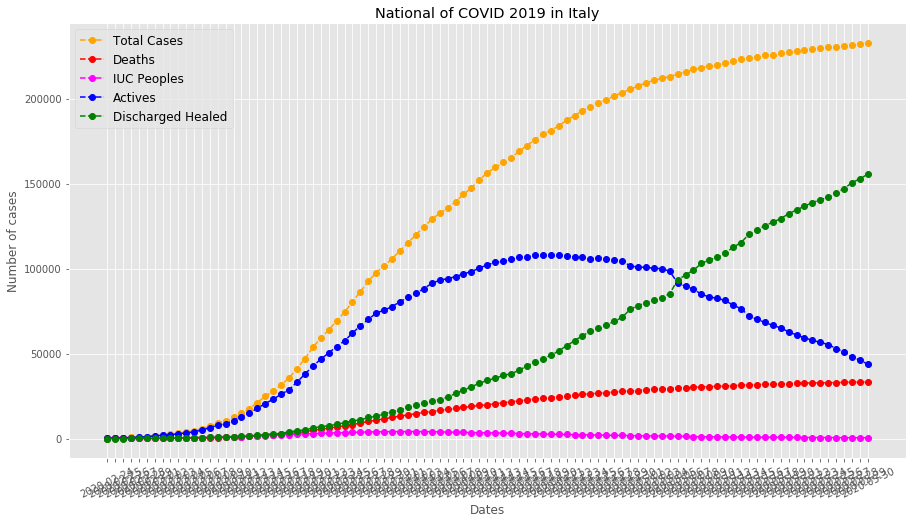

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(df_naz.data, df_naz.totale_casi, c="orange", label="Total Cases", linestyle="--", marker="o")
ax.plot(df_naz.data, df_naz.deceduti, c="red", label="Deaths", linestyle="--", marker="o")
ax.plot(df_naz.data, df_naz.terapia_intensiva, c="magenta", label="IUC Peoples", linestyle="--", marker="o")
ax.plot(df_naz.data, df_naz.totale_positivi, c="blue", label="Actives", linestyle="--", marker="o")
ax.plot(df_naz.data, df_naz.dimessi_guariti, c="green", label="Discharged Healed", linestyle="--", marker="o")
ax.legend(prop={"size": 12})
ax.set_title("National of COVID 2019 in Italy")
ax.set_xlabel("Dates")
ax.set_ylabel("Number of cases")

# Create a unique xticks dates list
xticks_list = [d for idx, d in enumerate(df_naz.data)]
plt.xticks(xticks_list, rotation=25)

fig.savefig(FIGS_PATH+"trend-of-covid-19-in-italy.png")
plt.show()

## Trend of COVID 2019 in Italy with Logaritmic Scale (Deaths, Actives, Total Cases)

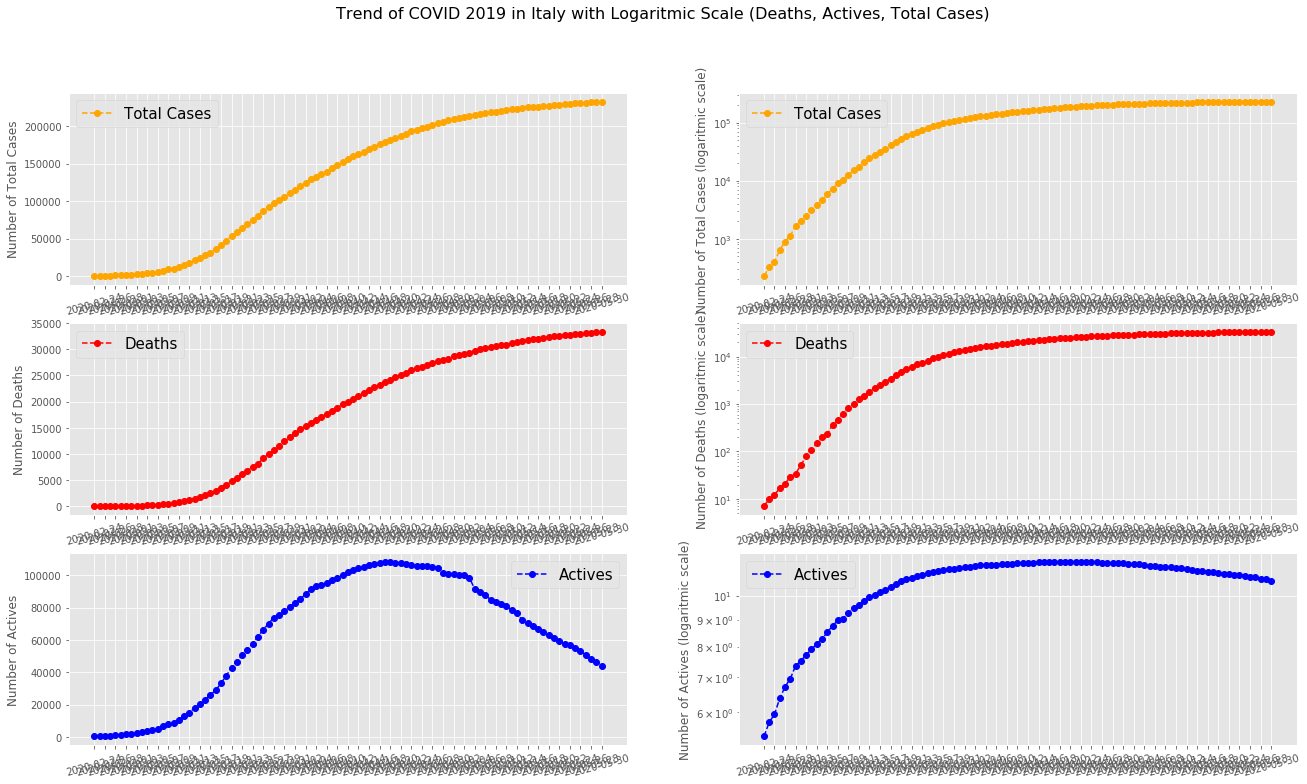

In [7]:
# Create a unique list of dates for xlabel
xticks_list = [d for idx, d in enumerate(df_naz.data) if idx % 2 == 0]

fig = plt.figure(figsize=(22, 12))

fig.suptitle('Trend of COVID 2019 in Italy with Logaritmic Scale (Deaths, Actives, Total Cases)', fontsize=16)

ax0 = plt.subplot(3, 2, 1)
ax0.plot(df_naz.data, df_naz.totale_casi, c="orange", label="Total Cases", linestyle="--", marker="o")
ax0.legend(prop={"size": 15})
ax0.set_ylabel("Number of Total Cases")

plt.xticks(xticks_list, rotation=15)

ax1 = plt.subplot(3, 2, 2)
ax1.plot(df_naz.data, df_naz.totale_casi, c="orange", label="Total Cases", linestyle="--", marker="o")
ax1.legend(prop={"size": 15})
ax1.set_ylabel("Number of Total Cases (logaritmic scale)")
ax1.set_yscale("log")

plt.xticks(xticks_list, rotation=15)

ax2 = plt.subplot(3, 2, 3)
ax2.plot(df_naz.data, df_naz.deceduti, c="red", label="Deaths", linestyle="--", marker="o")
ax2.legend(prop={"size": 15})
ax2.set_ylabel("Number of Deaths")

plt.xticks(xticks_list, rotation=15)

ax3 = plt.subplot(3, 2, 4)
ax3.plot(df_naz.data, df_naz.deceduti, c="red", label="Deaths", linestyle="--", marker="o")
ax3.legend(prop={"size": 15})
ax3.set_ylabel("Number of Deaths (logaritmic scale)")
ax3.set_yscale("log")

plt.xticks(xticks_list, rotation=15)

ax4 = plt.subplot(3, 2, 5)
ax4.plot(df_naz.data, df_naz.totale_positivi, c="blue", label="Actives", linestyle="--", marker="o")
ax4.legend(prop={"size": 15})
ax4.set_ylabel("Number of Actives")

plt.xticks(xticks_list, rotation=15)

ax5 = plt.subplot(3, 2, 6)
ax5.plot(df_naz.data, np.log(df_naz.totale_positivi), c="blue", label="Actives", linestyle="--", marker="o")
ax5.legend(prop={"size": 15})
ax5.set_ylabel("Number of Actives (logaritmic scale)")
ax5.set_yscale("log")

plt.xticks(xticks_list, rotation=15)

fig.savefig(FIGS_PATH+"trend-of-covid-19-in-italy-with-logaritmic-scale-deaths-actives-total-cases.png")
plt.show()

## Trend of IUC Peoples due to COVID 2019 in Italy

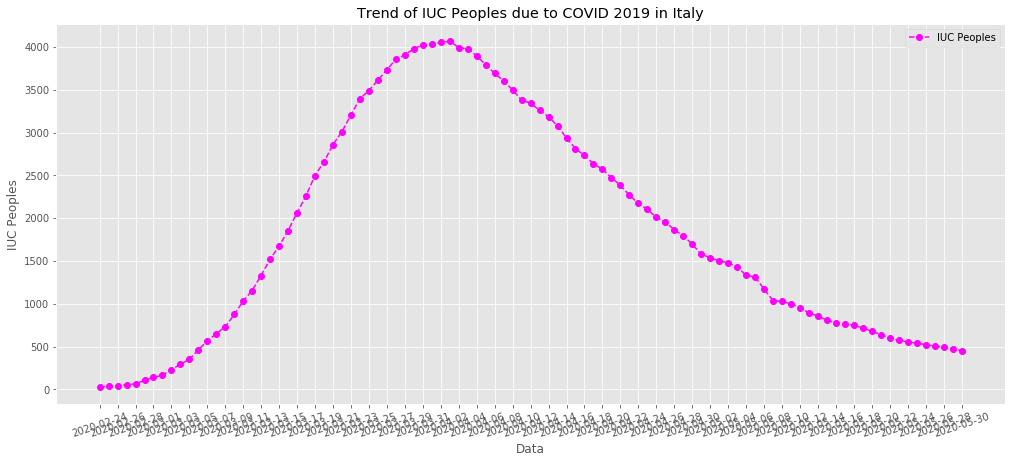

In [8]:
# Create a unique list of dates for xlabel
xticks_list = [d for idx, d in enumerate(df_naz.data) if idx % 2 == 0]

fig, ax = plt.subplots(figsize=(17, 7))

ax.plot(df_naz.data, df_naz.terapia_intensiva, c="magenta", label="IUC Peoples", linestyle="--", marker="o")
ax.set(title="Trend of IUC Peoples due to COVID 2019 in Italy",
       xlabel="Data",
       ylabel="IUC Peoples")

ax.legend()

plt.xticks(xticks_list, rotation=18)

fig.savefig(FIGS_PATH+"trend-of-iuc-peoples-due-to-covid-2019-in-italy.png")
plt.show()

## Cases and Deaths by Date of Report

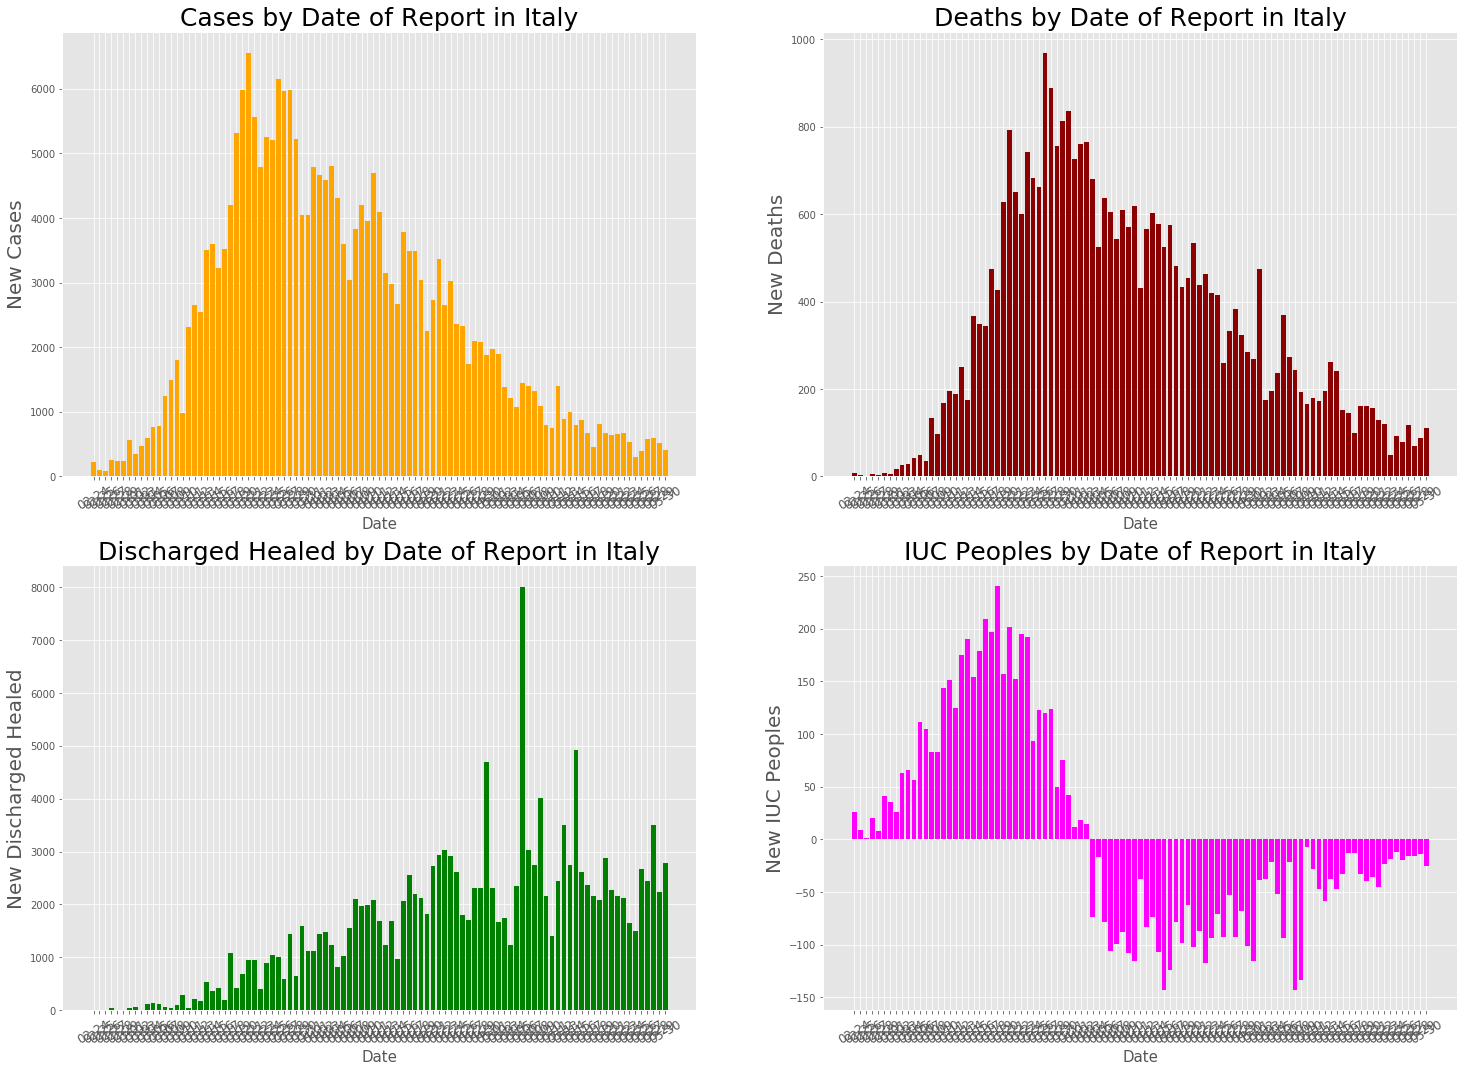

In [9]:
fig = plt.figure(figsize=(25, 18))

# Create a unique x axis dates list
x_axis_list = [str(d).replace("2020-", "").replace(" 18:00:00", "").replace(" 17:00:00", "") for idx, d in enumerate(df_naz.data)]

ax0 = plt.subplot(2, 2, 1)

ax0.bar(x_axis_list, df_naz.nuovi_positivi, color="orange")
ax0.set_title("Cases by Date of Report in Italy", fontsize=25)
ax0.set_xlabel("Date", fontsize=15)
ax0.set_ylabel("New Cases", fontsize=20)

plt.xticks(rotation=30, fontsize=12)

ax1 = plt.subplot(2, 2, 2)

# Create a new columns for new Death
new_deaths = []
for idx, death in enumerate(df_naz.deceduti):
    if idx == 0:
        new_deaths.append(death)
        old_deaths = death
    else:
        new_deaths.append(death-old_deaths)
        old_deaths = death

df_naz["nuovi_deceduti"] = new_deaths

ax1.bar(x_axis_list, df_naz.nuovi_deceduti, color="darkred")
ax1.set_title("Deaths by Date of Report in Italy", fontsize=25)
ax1.set_xlabel("Date", fontsize=15)
ax1.set_ylabel("New Deaths", fontsize=20)

plt.xticks(rotation=30, fontsize=12)

ax2 = plt.subplot(2, 2, 3)

# Create a new columns for new Death
new_health = []
for idx, health in enumerate(df_naz.dimessi_guariti):
    if idx == 0:
        new_health.append(health)
        old_health = health
    else:
        new_health.append(health-old_health)
        old_health = health

df_naz["nuovi_guariti"] = new_health

ax2.bar(x_axis_list, df_naz.nuovi_guariti, color="green")
ax2.set_title("Discharged Healed by Date of Report in Italy", fontsize=25)
ax2.set_xlabel("Date", fontsize=15)
ax2.set_ylabel("New Discharged Healed", fontsize=20)

plt.xticks(rotation=30, fontsize=12)

ax3 = plt.subplot(2, 2, 4)

# Create a new columns for new Death
new_iuc = []
for idx, iuc in enumerate(df_naz.terapia_intensiva):
    if idx == 0:
        new_iuc.append(iuc)
        old_iuc = iuc
    else:
        new_iuc.append(iuc-old_iuc)
        old_iuc = iuc

df_naz["nuovi_terapia_intensiva"] = new_iuc

ax3.bar(x_axis_list, df_naz.nuovi_terapia_intensiva, color="magenta")
ax3.set_title("IUC Peoples by Date of Report in Italy", fontsize=25)
ax3.set_xlabel("Date", fontsize=15)
ax3.set_ylabel("New IUC Peoples", fontsize=20)

plt.xticks(rotation=30, fontsize=12)

fig.savefig(FIGS_PATH+"cases-and-deaths-and-healted-and-iuc-by-date-of-report-covid-19-in-italy.png")
plt.show()

## Mortality Rate (New Cases vs. New Deaths)

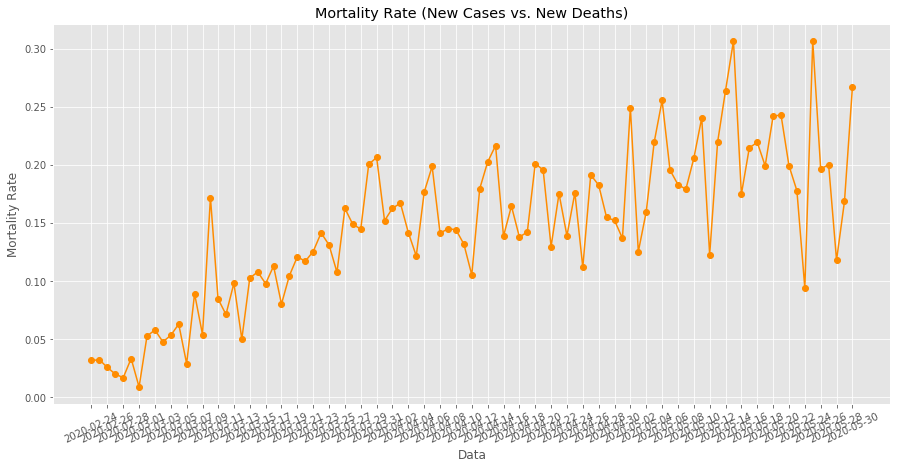

In [10]:
# Create Mortality Rate List
mortality_rate = new_deaths / df_naz.nuovi_positivi

# Plot the Mortality Rate
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(df_naz.data, mortality_rate, c="darkorange", marker="o")
ax.set(title="Mortality Rate (New Cases vs. New Deaths)",
       xlabel="Data",
       ylabel="Mortality Rate")

plt.xticks(xticks_list, rotation=25)

fig.savefig(FIGS_PATH+"mortality-rate-new-cases-vs-new-deaths-due-to-covid-2019-in-italy.png")
plt.show()

## Analysis by Regions of Italy

### Distribution of Cases in the Italian Regions - Pie Chart

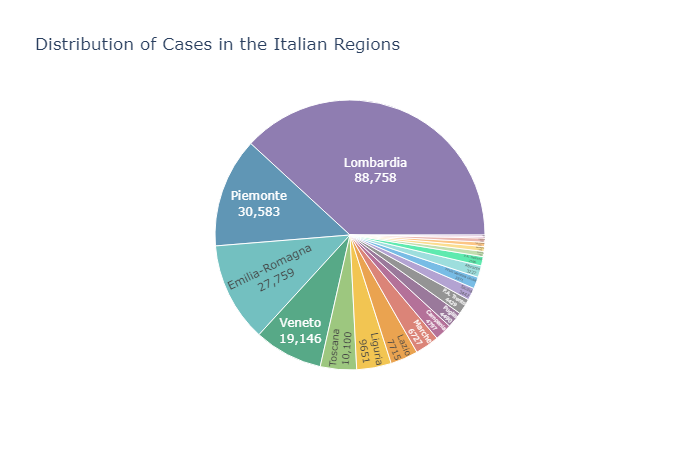

In [11]:
fig = px.sunburst(df_reg_latest.sort_values(by='totale_casi', ascending=False).reset_index(drop=True), 
                 path=["denominazione_regione"], values="totale_casi", height=650,
                 title='Distribution of Cases in the Italian Regions',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label+text+value'

fig.show(renderer="png")
fig.write_image(FIGS_PATH+"regions/distribution-of-cases-italian-regions-covid-19.png")

### Deaths vs. Actives in Italy due to COVID-19

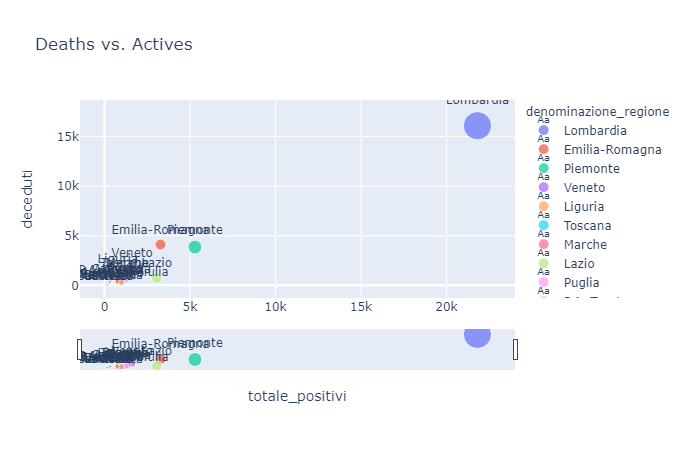

In [12]:
fig = px.scatter(df_reg_latest.sort_values('deceduti', ascending=False), 
                 x='totale_positivi', y='deceduti', color='denominazione_regione', 
                 size='totale_positivi', 
                 height=650,
                 text='denominazione_regione', title='Deaths vs. Actives')
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_rangeslider_visible=True)

fig.show(renderer="png")
fig.write_image(FIGS_PATH+"regions/deaths-vs.-actives-in-italy-due-to-covid-19.png")

### Cases in the Italian Regions

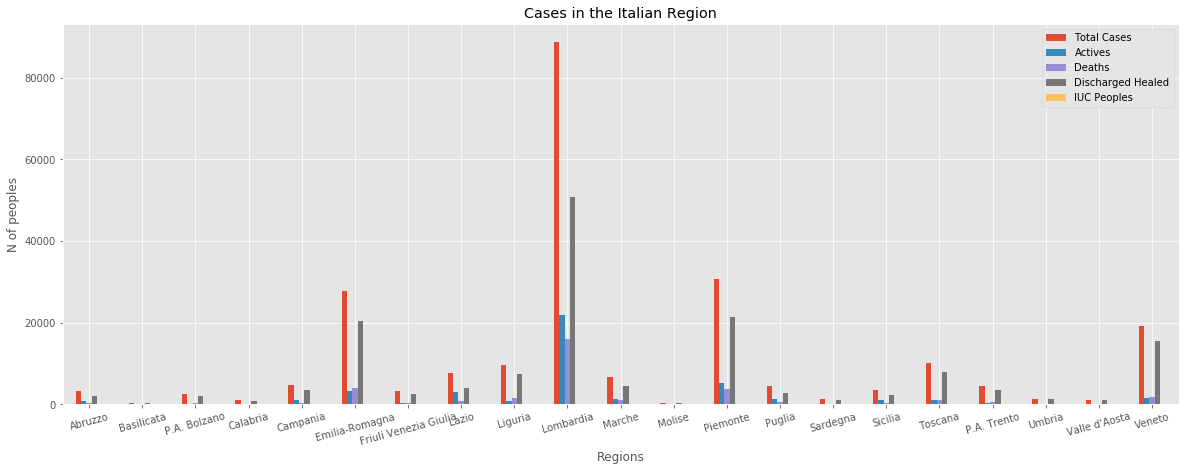

In [13]:
df_reg_tmp = pd.DataFrame({"Total Cases": df_reg_latest.totale_casi,
                           "Actives": df_reg_latest.totale_positivi,
                           "Deaths": df_reg_latest.deceduti,
                           "Discharged Healed": df_reg_latest.dimessi_guariti,
                           "IUC Peoples": df_reg_latest.terapia_intensiva})
df_reg_tmp.index = df_reg_latest.denominazione_regione

df_reg_tmp.plot.bar(figsize=(20, 7))
plt.title("Cases in the Italian Region")
plt.xlabel("Regions")
plt.ylabel("N of peoples")
plt.xticks(rotation=15)

plt.savefig(FIGS_PATH+"regions/cases-in-the-italian-regions-covid-19.png")
plt.show()

### Cases in the Italian Region (exluding 'Lomabrdia' & 'Emilia Romagna')

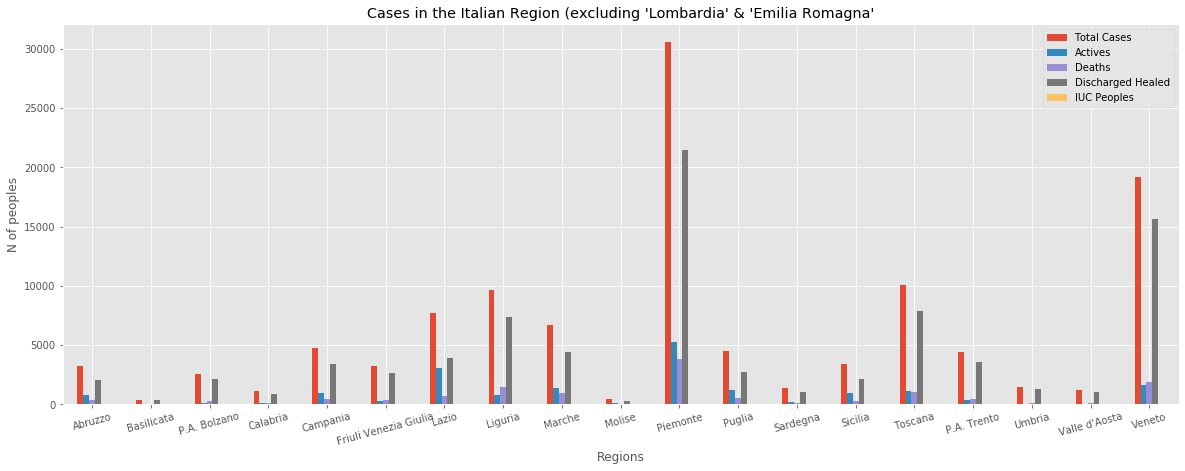

In [14]:
df_reg_tmp = pd.DataFrame({"Total Cases": df_reg_latest.totale_casi,
                           "Actives": df_reg_latest.totale_positivi,
                           "Deaths": df_reg_latest.deceduti,
                           "Discharged Healed": df_reg_latest.dimessi_guariti,
                           "IUC Peoples": df_reg_latest.terapia_intensiva})
df_reg_tmp.index = df_reg_latest.denominazione_regione

# Remove 'Lombardia' & 'Emilia Romagna'
df_reg_tmp.drop("Lombardia", axis=0, inplace=True)
df_reg_tmp.drop("Emilia-Romagna", axis=0, inplace=True)

df_reg_tmp.plot.bar(figsize=(20, 7))
plt.title("Cases in the Italian Region (excluding 'Lombardia' & 'Emilia Romagna'")
plt.xlabel("Regions")
plt.ylabel("N of peoples")
plt.xticks(rotation=15)

plt.savefig(FIGS_PATH+"regions/cases-in-the-italian-regions-covid-19-excluding-lombardia-and-emiliaromagna.png")
plt.show()

## Trend in the Regions of Italy - Time Evolution

### Deaths by Region in Italy due to COVID-19

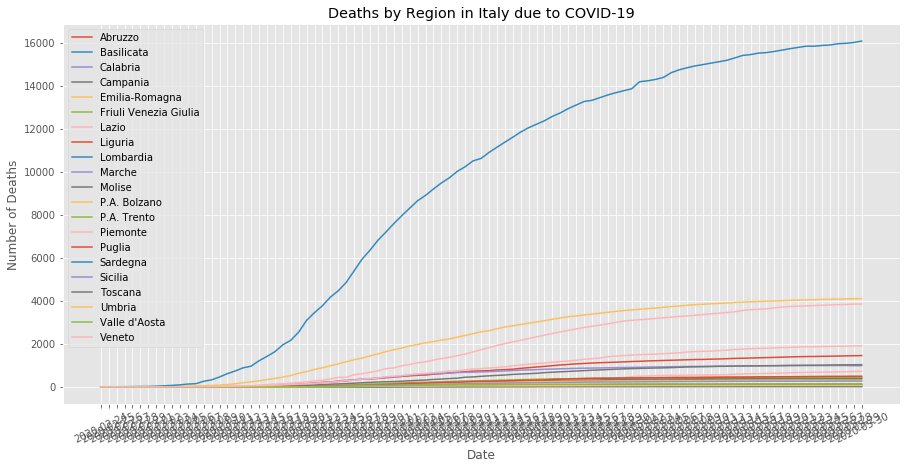

In [15]:
fig, ax = plt.subplots(figsize=(15, 7))

for reg in np.unique(df_reg.denominazione_regione):
  ax.plot(df_reg.data[df_reg.denominazione_regione == reg], df_reg.deceduti[df_reg.denominazione_regione == reg], label=reg)
  
ax.legend()
ax.set(title="Deaths by Region in Italy due to COVID-19",
       xlabel="Date",
       ylabel="Number of Deaths")

# Create a unique xticks dates list
xticks_list = [d for idx, d in enumerate(df_naz.data)]
plt.xticks(xticks_list, rotation=25)

fig.savefig(FIGS_PATH+"regions/deaths-by-region-in-italy-due-to-covid-19.png")
plt.show()

### Deaths by Region in Italy due to COVID-19 (excluding 'Lombardia' & 'Emilia Romagna')

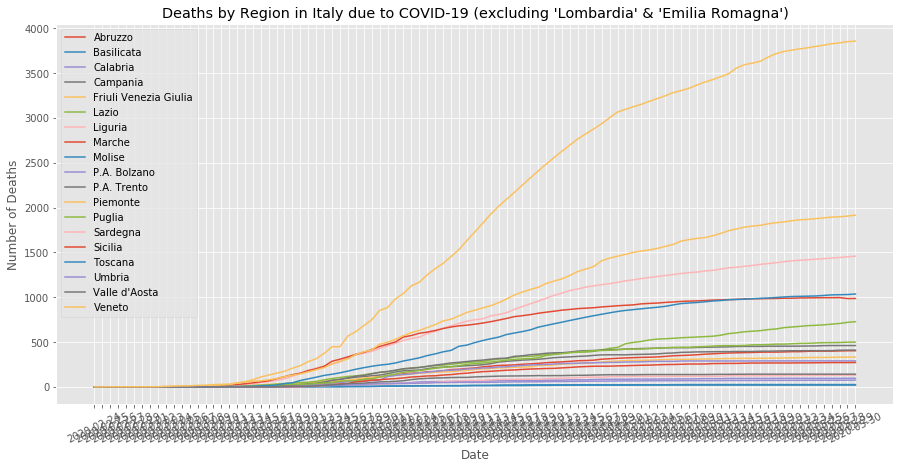

In [16]:
fig, ax = plt.subplots(figsize=(15, 7))

for reg in np.unique(df_reg.denominazione_regione):
  if reg != "Lombardia" and reg != "Emilia-Romagna":
    ax.plot(df_reg.data[df_reg.denominazione_regione == reg], df_reg.deceduti[df_reg.denominazione_regione == reg], label=reg)

ax.legend()
ax.set(title="Deaths by Region in Italy due to COVID-19 (excluding 'Lombardia' & 'Emilia Romagna')",
       xlabel="Date",
       ylabel="Number of Deaths")

# Create a unique xticks dates list
xticks_list = [d for idx, d in enumerate(df_naz.data)]
plt.xticks(xticks_list, rotation=25)

fig.savefig(FIGS_PATH+"regions/deaths-by-region-in-italy-due-to-covid-19-excluding-lombardia-and-emiliaromagna.png")
plt.show()

#### Last Update 

In [17]:
import datetime as dt
dt_string = dt.datetime.now().strftime("%Y/%m/%d-%H:%M:%S")
print(f"Kernel last updated: {dt_string}")

Kernel last updated: 2020/05/30-22:34:32
